<a href="https://colab.research.google.com/github/VivekAdluri/Data-Visualization-Dashboard/blob/main/Data_Visualization_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jamesvandenberg/renewable-power-generation")

print("Path to dataset files:", path)

100%|██████████| 6.93k/6.93k [00:00<00:00, 8.26MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jamesvandenberg/renewable-power-generation/versions/2


In [ ]:
import shutil
import os

files = os.listdir(path)

for file in files:
    full_path = os.path.join(path, file)
    if os.path.isfile(full_path):
        shutil.move(full_path, '/content/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

data=pd.read_csv("/content/Continent_Consumption_TWH.csv")
print(data.head())

   Year      World      OECD     BRICS    Europe  North America  \
0  1990  101855.54  52602.49  26621.07  20654.88       24667.23   
1  1991  102483.56  53207.25  26434.99  20631.62       24841.68   
2  1992  102588.23  53788.75  25993.05  20189.68       25341.77   
3  1993  103646.56  54614.48  26283.80  20189.68       25830.23   
4  1994  104449.03  55579.77  25993.05  20085.01       26365.21   

   Latin America      Asia  Pacific   Africa  Middle-East       CIS  
0        5373.06  24574.19  1197.89  4407.77      2581.86  16049.40  
1        5500.99  24783.53  1186.26  4535.70      2744.68  15898.21  
2        5628.92  25690.67  1209.52  4582.22      3081.95  14339.79  
3        5675.44  26876.93  1267.67  4721.78      3349.44  13246.57  
4        5989.45  28098.08  1279.30  4803.19      3640.19  11606.74  


In [ ]:
print(data.columns)

Index(['Year', 'World', 'OECD', 'BRICS', 'Europe', 'North America',
       'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East', 'CIS'],
      dtype='object')


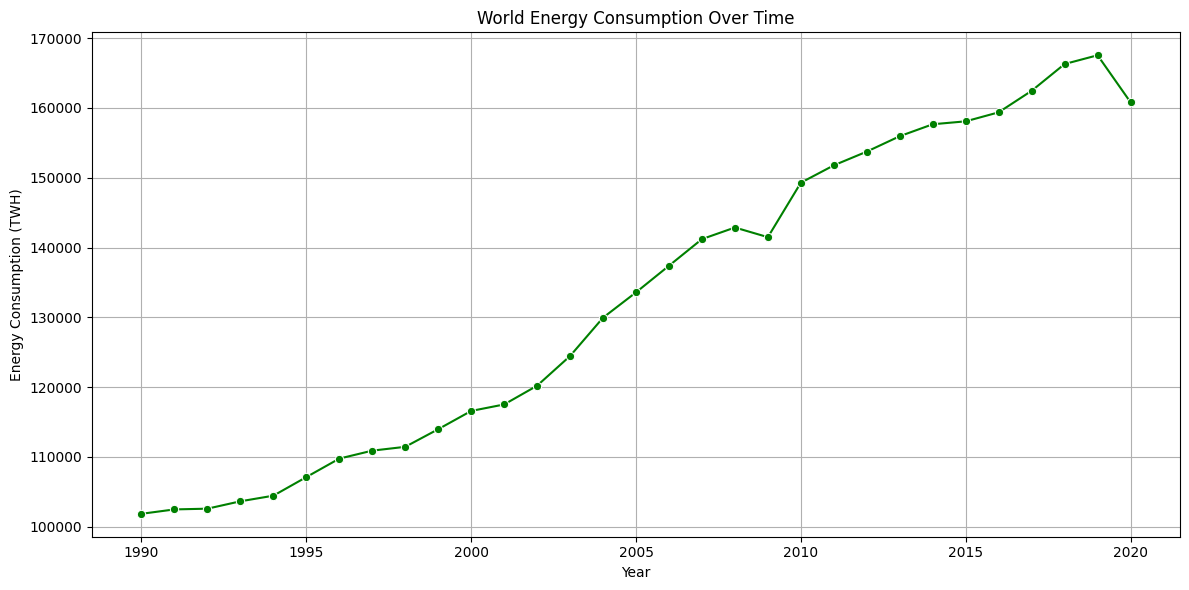

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='World', marker='o', color='green')
plt.title('World Energy Consumption Over Time')
plt.ylabel('Energy Consumption (TWH)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


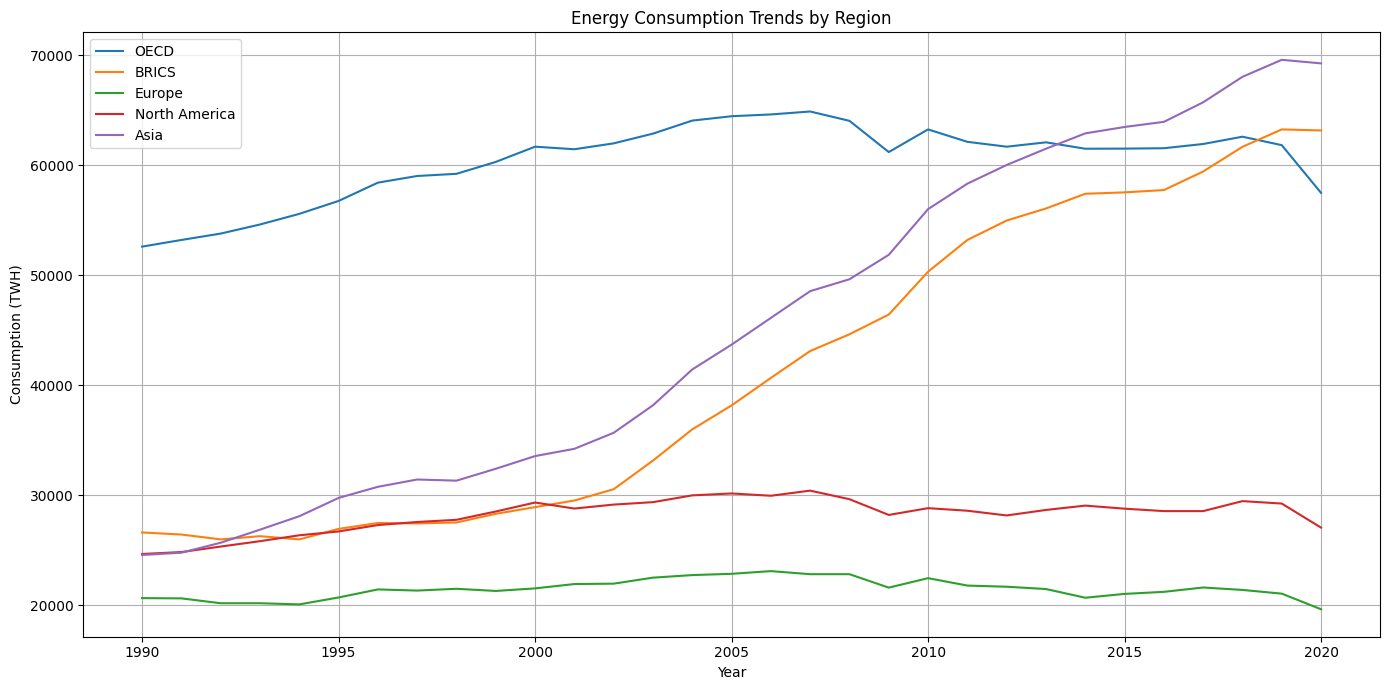

In [ ]:
plt.figure(figsize=(14, 7))
regions = ['OECD', 'BRICS', 'Europe', 'North America', 'Asia']
for region in regions:
    plt.plot(data['Year'], data[region], label=region)

plt.title('Energy Consumption Trends by Region')
plt.xlabel('Year')
plt.ylabel('Consumption (TWH)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


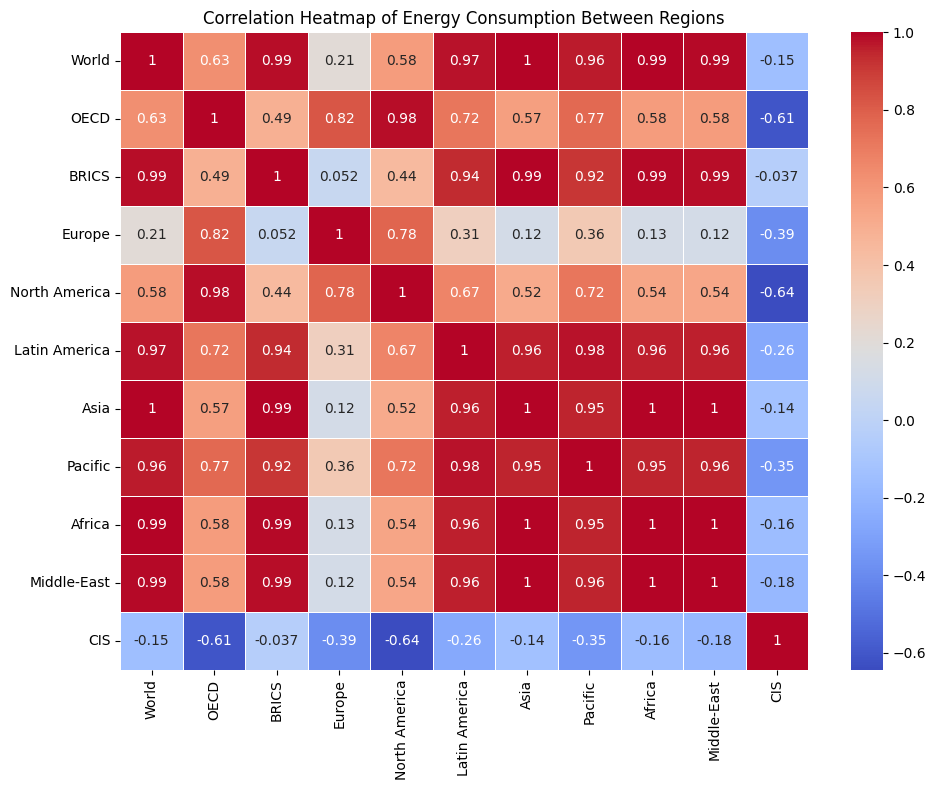

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.drop(columns='Year').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Energy Consumption Between Regions')
plt.tight_layout()
plt.show()


In [ ]:
fig = px.line(data_frame=data, x='Year', y=['OECD', 'BRICS', 'Europe', 'North America', 'Asia',
                                            'Latin America', 'Africa', 'Middle-East', 'Pacific', 'CIS'],
              title="Interactive Line Chart: Energy Consumption by Continent")
fig.update_layout(xaxis_title='Year', yaxis_title='Energy Consumption (TWH)')
fig.show()
